# XGBoost example
In this notebook we will train a simple gradient boosting model (using XGBoost) on telecom data.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import xgboost as xgb

In [ ]:
df = pd.read_csv('telecom_churn.csv')

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Let's just use numbers for States and make International plan,Voice mail plan and Churn binary.

state_enc = LabelEncoder()
df['State'] = state_enc.fit_transform(df['State'])
df['International plan'] = (df['International plan'] == 'Yes').astype('int')
df['Voice mail plan'] = (df['Voice mail plan'] == 'Yes').astype('int')
df['Churn'] = (df['Churn']).astype('int')

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [ ]:
# Split to train/test in the following proportion 7:3. Initialize DMatrix objects.

X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn', axis=1), df['Churn'],
                                                    test_size=0.3, stratify=df['Churn'], random_state=17)
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [ ]:
# Initialize parameters of the model

params = {
    'objective':'binary:logistic',    # binary classification
    'max_depth': 3,                   # limit max depth of trees
    'silent': 1,                      # muted output
    'eta': 1                          # learning rate
}

num_rounds = 50

In [ ]:
# Pass the dict of params, data itself and number of rounds

xgb_model = xgb.train(params, dtrain, num_rounds)

In [ ]:
# Check accuracy on test data using watchlist

watchlist  = [(dtest,'test'), (dtrain,'train')]
xgb_model = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	test-error:0.116	train-error:0.09087
[1]	test-error:0.102	train-error:0.068581
[2]	test-error:0.071	train-error:0.040291
[3]	test-error:0.064	train-error:0.034719
[4]	test-error:0.071	train-error:0.036005
[5]	test-error:0.07	train-error:0.033862
[6]	test-error:0.069	train-error:0.032147
[7]	test-error:0.073	train-error:0.030433
[8]	test-error:0.07	train-error:0.028718
[9]	test-error:0.074	train-error:0.028718
[10]	test-error:0.07	train-error:0.02829
[11]	test-error:0.07	train-error:0.028718
[12]	test-error:0.063	train-error:0.026575
[13]	test-error:0.067	train-error:0.024432
[14]	test-error:0.069	train-error:0.02186
[15]	test-error:0.069	train-error:0.021432
[16]	test-error:0.068	train-error:0.02186
[17]	test-error:0.063	train-error:0.019288
[18]	test-error:0.07	train-error:0.021003
[19]	test-error:0.067	train-error:0.01886
[20]	test-error:0.069	train-error:0.019288
[21]	test-error:0.068	train-error:0.018003
[22]	test-error:0.065	train-error:0.016717
[23]	test-error:0.063	train-err

In [ ]:
# Make predictions
preds_prob = xgb_model.predict(dtest)

In [ ]:
predicted_labels = preds_prob > 0.5
print("Accuracy and F1 on the test set are: {} and {}".format(
    round(accuracy_score(y_test, predicted_labels), 3),
    round(f1_score(y_test, predicted_labels), 3)))

Accuracy and F1 on the test set are: 0.935 and 0.749


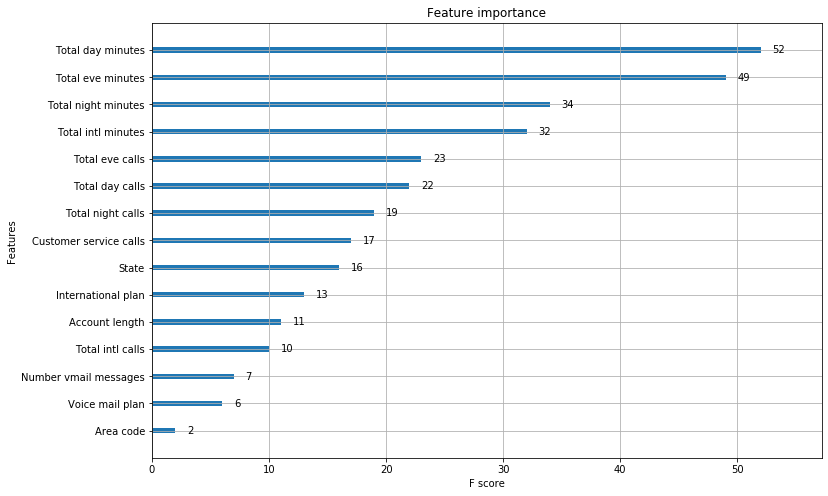

In [ ]:
# Plot feature imporatance
ax = xgb.plot_importance(xgb_model)
fig = ax.figure
fig.set_size_inches(12, 8)